In [73]:
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



""" TODO:"""
# May need to apply shift scaling, such as min-max or standardization

# Later change the current spliting from the whole data to the extra data \
#     "Test" should later be "songs_to_classify.csv"

# Apply cross_validation to improve test accuracy

# Test diffrent methods:
"""
1) Logistic Regression: Logistic Regression, Naive Bayes Classifier
2) Discriminant analysis: LDA, QDA
3) Decision Trees <- Especially Bagging, but also reandomForrest
4) Boosted Trees  <- Boosting seemed to do very well
5) Random Forest  <- Seemed good
6) K-Nearest Neighbor
-------------------
7) Neural Networks
8) Support Vector Machines (SVM) <- Good, but not learned yet

"""



"""
Categories:
-----------
danceability
energy
key
loudness
mode
speechiness
acousticness
label
"""


# Fantastic!!!!!
# Change all categorical values into categorical integer values 
# Sklearn cant work with strings
songs = pd.read_csv('training_data.csv')
songs = songs.apply(LabelEncoder().fit_transform)



# Set the "Label to make predictions agains"
# We now make "x" (Song dataset with out labels) and "y" (labels - like/dislike)
label = songs.label                         # y
features = songs.drop(columns='label')          # X

# Now lets split the data into test and training
# Needs to be in that order
# With 20% split, we have 400 training, 100 test
train_song, test_song, train_label, test_label = train_test_split(features, 
                                                                 label, 
                                                                 test_size=0.2, 
                                                                 random_state=2)


"""
print("train song ", len(train_song))
print("train label ", len(train_label))
print("test song ", len(test_song))
print("test label ", len(test_label))
"""

# Initialize classifier
clf = GaussianNB()
#clf = LinearRegression()
# ADD MORE!!!!



# Rescale with standard scaler  - Gave lower prediction accuracy
#sc = StandardScaler()
#train_song = sc.fit_transform(train_song)
#test_song = sc.fit_transform(test_song)


# Rescale the data features with min max - Seems to give worse result at times for Naive Bayes
# ... Needs to be tested on other models
#sc = MinMaxScaler()
#train_song = sc.fit_transform(train_song)
#test_song = sc.fit_transform(test_song)


# Train our classifier
model = clf.fit(train_song, train_label)

# Make predictions
prediction = clf.predict(test_song)
#print(predict)




# See test score
print("\nCurrent accuracy is: ", accuracy_score(test_label, prediction))

print("\nClassification matrix: \n",confusion_matrix(test_label, prediction))

print("\n\nClassification raport \n", classification_report(test_label, prediction))






Current accuracy is:  0.77

Classification matrix: 
 [[43  6]
 [17 34]]


Classification raport 
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        49
           1       0.85      0.67      0.75        51

   micro avg       0.77      0.77      0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



0      1
1      0
2      1
3      1
4      1
5      0
6      1
7      1
8      1
9      0
10     1
11     1
12     1
13     1
14     0
15     0
16     1
17     0
18     0
19     1
20     1
21     1
22     0
23     1
24     1
25     0
26     1
27     0
28     1
29     0
      ..
470    1
471    1
472    0
473    0
474    1
475    0
476    1
477    0
478    0
479    0
480    1
481    1
482    0
483    1
484    1
485    0
486    1
487    1
488    1
489    1
490    1
491    1
492    0
493    1
494    1
495    0
496    0
497    1
498    1
499    1
Name: label, Length: 500, dtype: int64


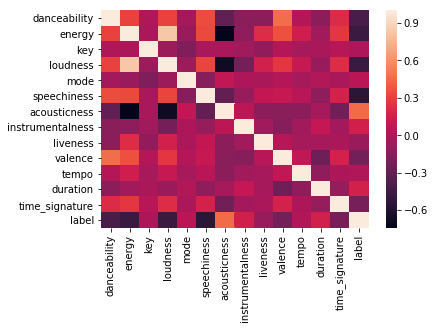

In [74]:
# Test various things

import seaborn as sns
%matplotlib inline


test = songs.corr()
test["label"]

print(label)

test["label"].sort_values(ascending=False)




# calculate the correlation matrix
corr = songs.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
